<a href="https://colab.research.google.com/github/akshcha/Customer-Churn-Prediction/blob/main/CCPipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/CCP dataset.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(" ", np.nan))


In [ ]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


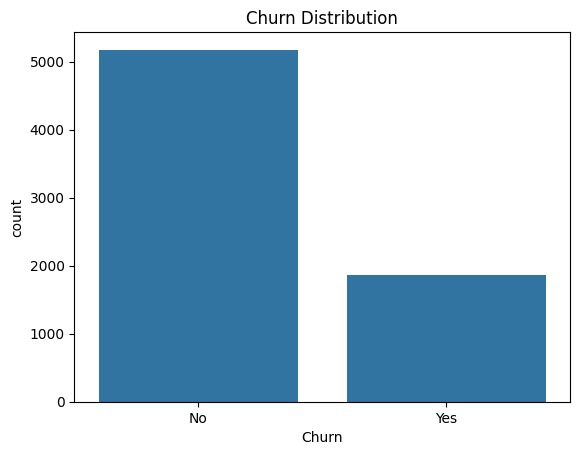

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

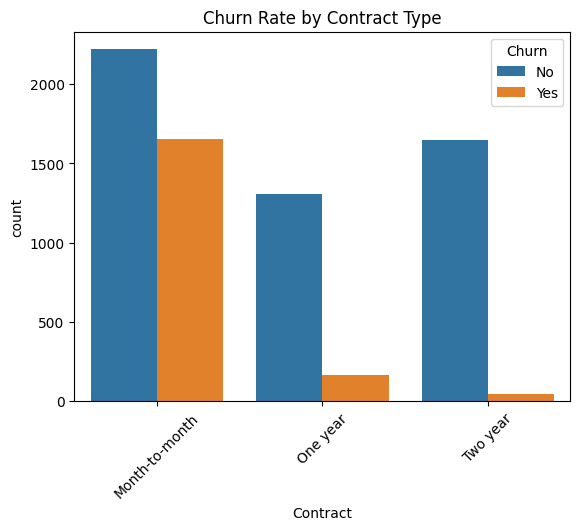

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.xticks(rotation=45)
plt.show()

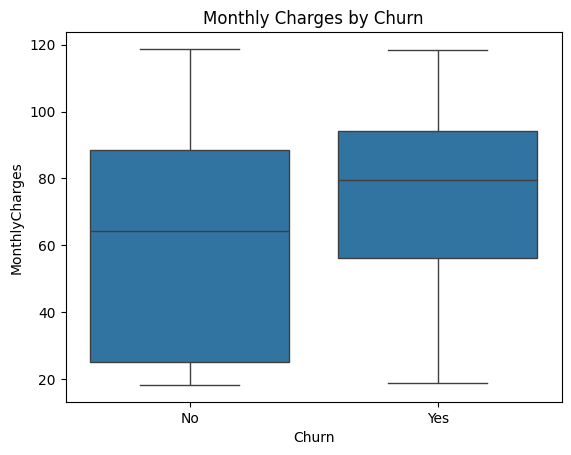

In [ ]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges by Churn")
plt.show()

In [ ]:
df['TenureGroup'] = pd.cut(df['tenure'], bins=[0, 12, 24, 48, 72], labels=['<1 yr', '1–2 yrs', '2–4 yrs', '4–6 yrs'])


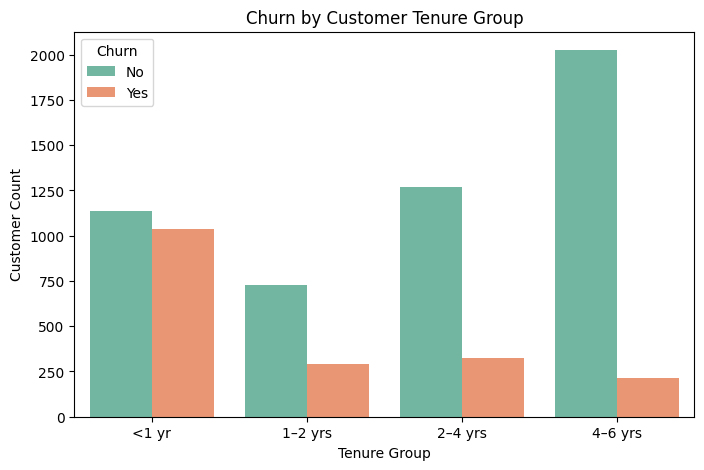

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='TenureGroup', hue='Churn', data=df, palette='Set2')
plt.title("Churn by Customer Tenure Group")
plt.xlabel("Tenure Group")
plt.ylabel("Customer Count")
plt.show()

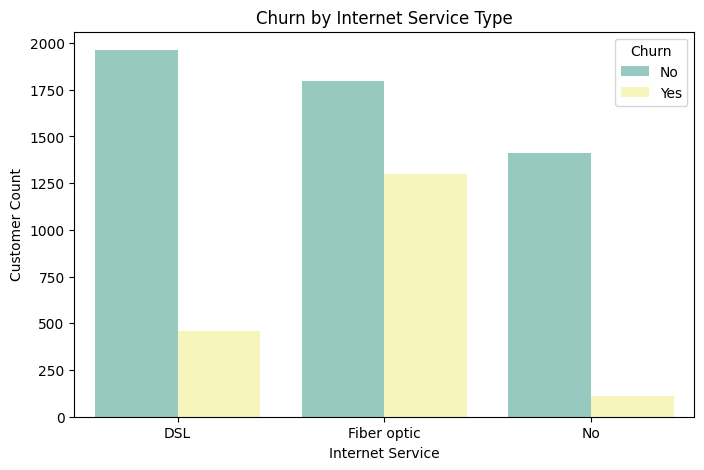

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set3')
plt.title("Churn by Internet Service Type")
plt.xlabel("Internet Service")
plt.ylabel("Customer Count")
plt.show()


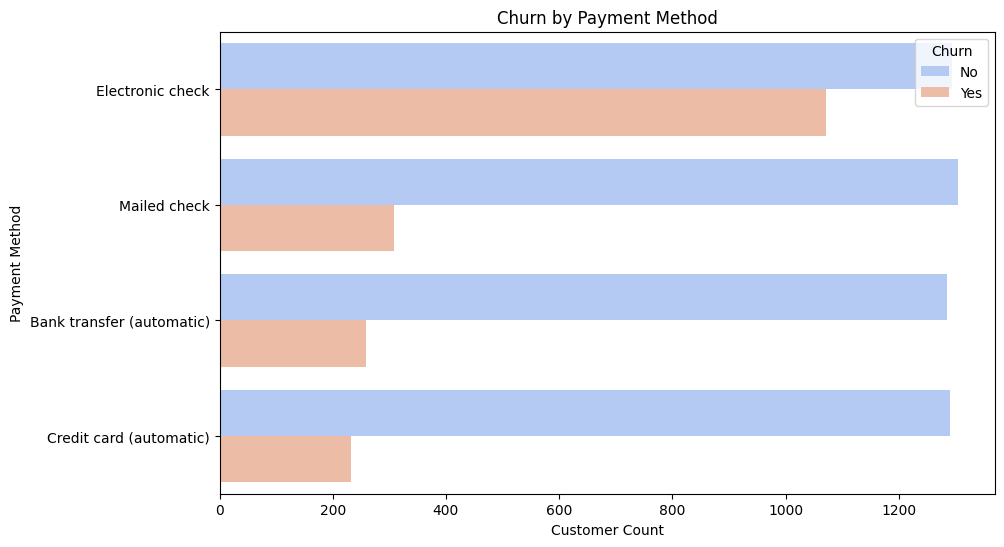

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(y='PaymentMethod', hue='Churn', data=df, palette='coolwarm')
plt.title("Churn by Payment Method")
plt.xlabel("Customer Count")
plt.ylabel("Payment Method")
plt.legend(title='Churn')
plt.show()


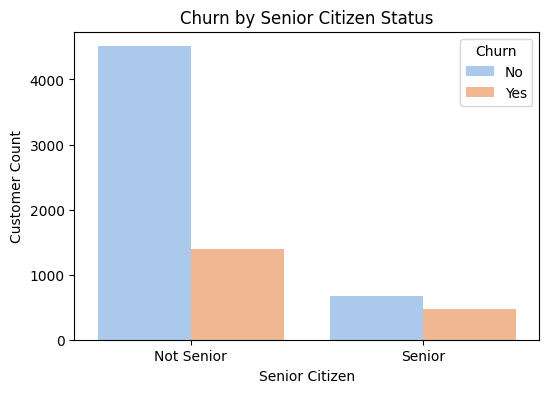

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette='pastel')
plt.title("Churn by Senior Citizen Status")
plt.xticks([0, 1], ['Not Senior', 'Senior'])
plt.xlabel("Senior Citizen")
plt.ylabel("Customer Count")
plt.show()

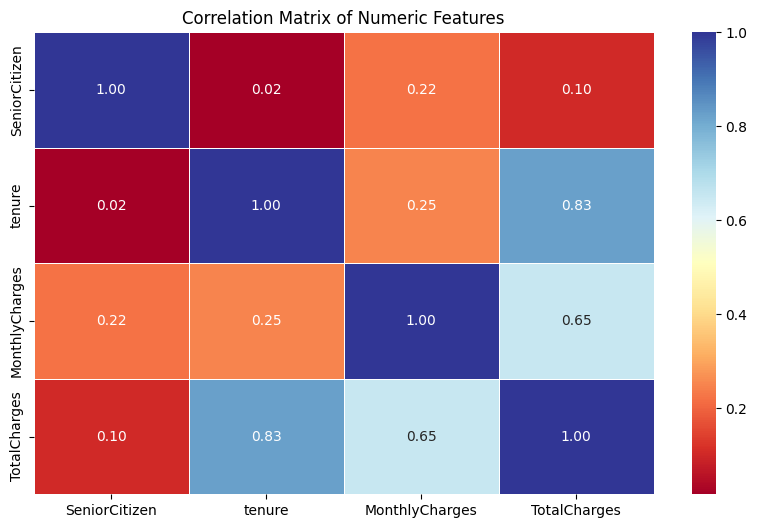

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdYlBu', linewidths=0.5)
plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Copy original dataframe to avoid modifying it
data = df.copy()

# Drop non-predictive or problematic columns
data.drop(['customerID', 'TenureGroup'], axis=1, errors='ignore', inplace=True)

# Convert target column 'Churn' to binary (Yes = 1, No = 0)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# Encode all remaining categorical variables
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Define features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred = log_model.predict(X_test)

# Evaluation metrics
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📝 Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy Score: 0.8161816891412349

📊 Confusion Matrix:
 [[935 101]
 [158 215]]

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



In [ ]:
# Coefficients for interpretability
feature_weights = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_model.coef_[0]
}).sort_values(by='Importance', ascending=False)

# Top features
feature_weights.head(10)


,Feature,Importance
15,PaperlessBilling,0.352626
7,InternetService,0.229816
1,SeniorCitizen,0.176026
2,Partner,0.075393
6,MultipleLines,0.070015
16,PaymentMethod,0.056824
13,StreamingMovies,0.039197
17,MonthlyCharges,0.021968
18,TotalCharges,0.000280
12,StreamingTV,-0.014866


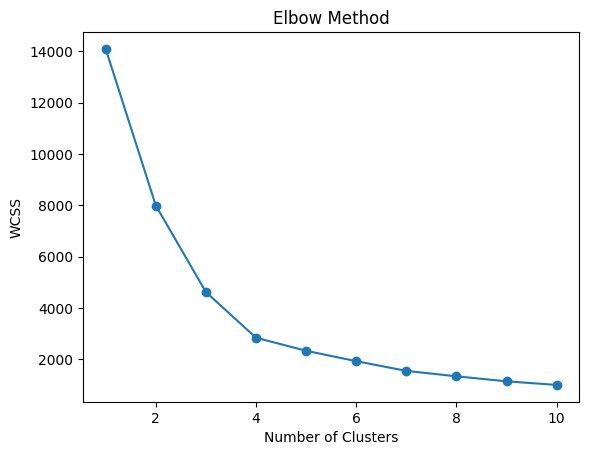

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select segmentation features
seg_df = df[['tenure', 'MonthlyCharges']]

# Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
seg_scaled = scaler.fit_transform(seg_df)

# Elbow method to choose optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(seg_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


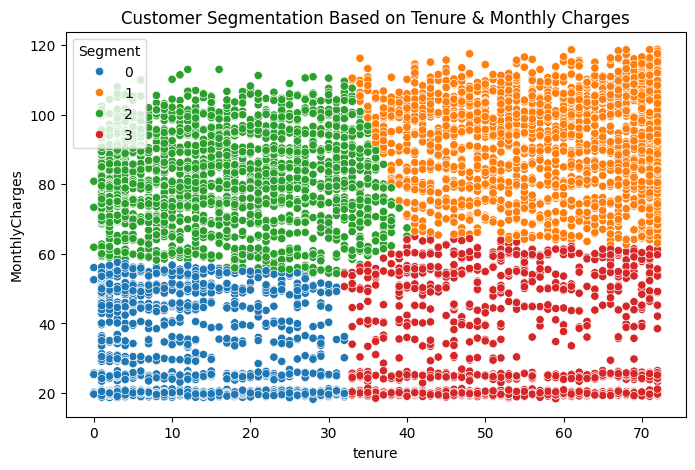

In [ ]:
# Apply KMeans (use 4 clusters for simplicity)
kmeans = KMeans(n_clusters=4, random_state=42)
df['Segment'] = kmeans.fit_predict(seg_scaled)

# Plot the clusters
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Segment', palette='tab10')
plt.title("Customer Segmentation Based on Tenure & Monthly Charges")
plt.show()